In [10]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
log_file = [line.strip() for line in open("C:/Users/FEM/Gitprojects/MAB-strategy-2/results/Execute all_logs_us.txt LAST 3 ALL true true.txt", 'r')]
# log_file = [line.strip() for line in open("C:/Users/FEM/Gitprojects/MAB-strategy-2/results/Execute all_logs_UK.txt LAST 3 ALL true true.txt", 'r')]


In [12]:
sessions = [x for x in log_file if x.startswith("Bandit{chunk=Name:")]
s = set(sessions)
bandit_list = [x[19:] for x in s]

In [13]:
bandit_list

['coPaymentIndex',
 'topSearchClicksIndex',
 'searchClickPaymentIndex',
 'searchCoPaymentIndex',
 'topClicksIndex',
 'searchCoClicksIndex',
 'coClicksIndex',
 'clickPaymentIndex']

In [14]:
values = []
for index in bandit_list:
#     index = "searchCoPaymentIndex"
    list = [];
    for row in range(1,len(log_file)):
        if log_file[row].startswith("Bandit{chunk=Name:"):
            current_index = log_file[row][19:]
        if log_file[row].startswith(",") and current_index==index:
            mean = (float)(log_file[row][log_file[row].index("mean=")+5:log_file[row].index(", variance:=")])
#             print("%s: %s"%(index, mean))
            list.append(mean)
    values.append(list)
# print(values)


In [15]:
# values

<IPython.core.display.Javascript object>


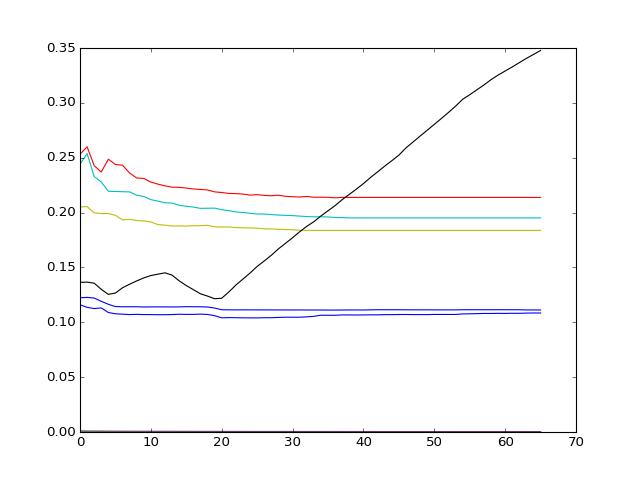

In [16]:
plt.figure(1)
ax = plt.subplot(1, 1, 1)
for row in range(0,len(bandit_list)):
    plt.plot(values[row], label=bandit_list[row])


# # Shrink current axis by 20%
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.5, box.height])

# # plt.legend(loc='upper left')
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [17]:
for row in range(0,len(bandit_list)):
    print("%s: %f"%(bandit_list[row], values[row][-1]))


coPaymentIndex: 0.111221
topSearchClicksIndex: 0.000375
searchClickPaymentIndex: 0.213816
searchCoPaymentIndex: 0.195135
topClicksIndex: 0.000020
searchCoClicksIndex: 0.183743
coClicksIndex: 0.347707
clickPaymentIndex: 0.108451
